In [1]:
import numpy as np
from scipy import signal

# Визначення параметрів аналогового фільтру
wp = 2*np.pi*340   # Границя смуг пропускання
ws = 2*np.pi*100   # Границя смуг придушення
Rp = 3             # Максимальна амплітудна нерівномірність в смузі пропускання, дБ
As = 60            # Максимальне придушення в смузі придушення, дБ
type = 'lowpass'   # Тип фільтру

# Визначення порядку фільтру та параметрів Чебишева
N, Wn = signal.cheb1ord(wp, ws, Rp, As, analog=True)

# Визначення коефіцієнтів передачі
b, a = signal.cheby1(N, Rp, Wn, btype=type, analog=True, output='ba')


In [8]:
# Білінійне перетворення
fs = 2*np.pi*8000  # Частота дискретизації, Гц
b_digital, a_digital = signal.bilinear(b, a, fs)


In [9]:
# Створення рекурсивного цифрового фільтру
butterworth_filter = signal.iirfilter(N, Wn, btype='lowpass', analog=False, output='sos', fs=fs)

In [23]:
# Створення рекурсивного цифрового фільтру
z, p, _ = signal.iirfilter(N, Wn, btype='lowpass', analog=False, output='zpk', fs=fs)
print(f'Нулі: {z}')
print(f'Полюси: {p}')

Нулі: [-1. -1. -1. -1. -1.]
Полюси: [0.89183599+0.23203755j 0.79487028+0.12781502j 0.76317587+0.j
 0.79487028-0.12781502j 0.89183599-0.23203755j]


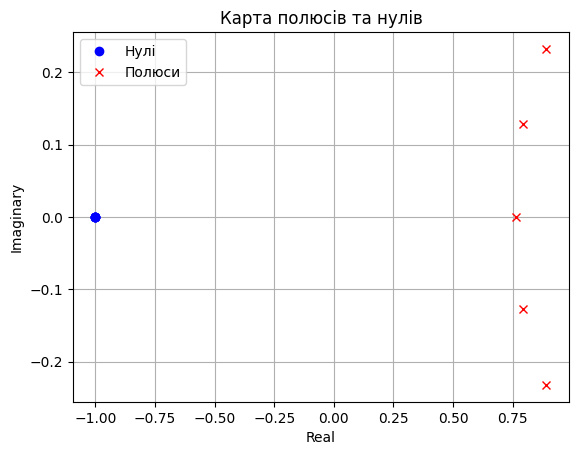

In [26]:
plt.plot(np.real(z), np.imag(z), 'bo', label='Нулі')
plt.plot(np.real(p), np.imag(p), 'rx', label='Полюси')
plt.legend()
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Карта полюсів та нулів')
plt.show()

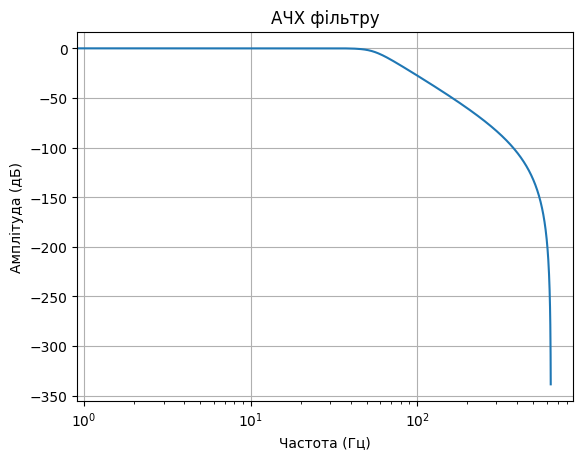

In [29]:
import matplotlib.pyplot as plt

# Відображення АЧХ фільтру
w, h = signal.sosfreqz(butterworth_filter, fs=8000)
fig, ax = plt.subplots(1, 1)
ax.semilogx(w/(2*np.pi), 20 * np.log10(abs(h)))
ax.set_title('АЧХ фільтру')
ax.set_xlabel('Частота (Гц)')
ax.set_ylabel('Амплітуда (дБ)')
ax.grid()
plt.show()


In [12]:
# Генерація випадкового вхідного сигналу
t = np.linspace(0, 1, 1000, endpoint=False)
x = np.random.randn(1000)

# Фільтрація вхідного сигналу
filtered_signal = signal.sosfiltfilt(butterworth_filter, x)


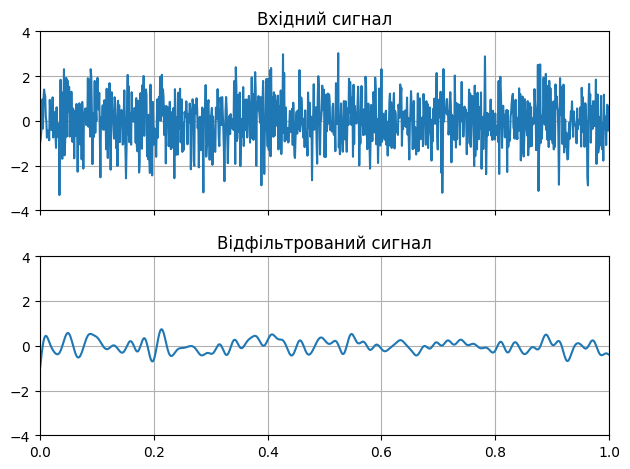

In [13]:
# Відображення графіків вхідного та відфільтрованого сигналів
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(t, x)
ax0.set_title('Вхідний сигнал')
ax0.axis([0, 1, -4, 4])
ax0.grid(True)

ax1.plot(t, filtered_signal)
ax1.set_title('Відфільтрований сигнал')
ax1.axis([0, 1, -4, 4])
ax1.grid(True)

plt.tight_layout()
plt.show()


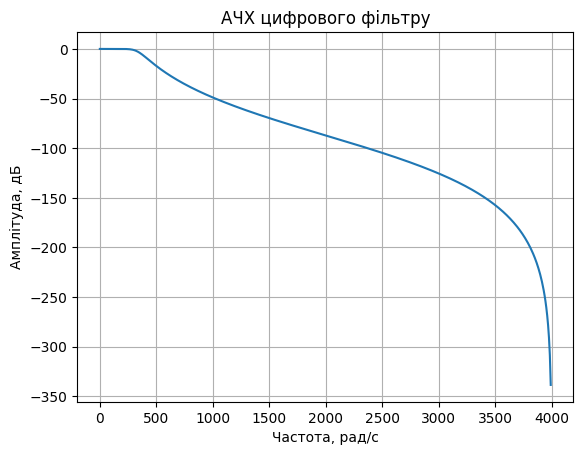

In [18]:
# Визначення передаточної функції та АЧХ цифрового фільтру
w, h = signal.sosfreqz(butterworth_filter, fs=8000)

# Відображення АЧХ цифрового фільтру
fig, ax = plt.subplots()
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_title('АЧХ цифрового фільтру')
ax.set_xlabel('Частота, рад/с')
ax.set_ylabel('Амплітуда, дБ')
ax.grid(True)

plt.show()


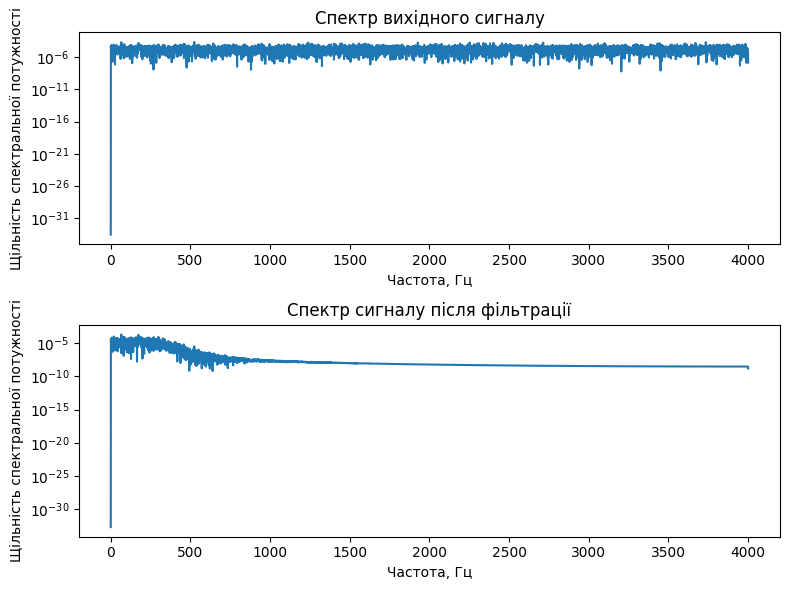

In [19]:
# Генерація випадкового сигналу
np.random.seed(0)
x = np.random.rand(10000)

# Застосування до сигналу цифрового фільтру
y = signal.sosfilt(butterworth_filter, x)

# Відображення спектрів сигналів
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Спектр вихідного сигналу
f, Pxx = signal.periodogram(x, fs=8000)
ax1.semilogy(f, Pxx)
ax1.set_title('Спектр вихідного сигналу')
ax1.set_xlabel('Частота, Гц')
ax1.set_ylabel('Щільність спектральної потужності')

# Спектр сигналу після фільтрації
f, Pyy = signal.periodogram(y, fs=8000)
ax2.semilogy(f, Pyy)
ax2.set_title('Спектр сигналу після фільтрації')
ax2.set_xlabel('Частота, Гц')
ax2.set_ylabel('Щільність спектральної потужності')

plt.tight_layout()
plt.show()


In [22]:
import sympy

# Задаємо символьну змінну s
s = sympy.symbols('s')

# Задаємо передаточну функцію H(s)
H = 1.4125 * (s - 2143.34) / (s**2 + 1256.64*s + 1)

# Знаходимо полюси і нулі фільтру
poles = sympy.solve(H, s)
zeros = sympy.solve(s - 2143.34, s)

# Виводимо результати
print("Полюси фільтру:", poles)
print("Нулі фільтру:", zeros)


Полюси фільтру: [2143.34000000000]
Нулі фільтру: [2143.34000000000]
